In [23]:
import pandas as pd

df = pd.read_csv('data/features.csv', parse_dates=['date'])
print(df.head())
print(df.columns)


        date ticker  close_price  sentiment_score  usd_inr_rate  \
0 2019-01-01    TCS    1717.5715           0.0000         70.76   
1 2019-01-02    TCS    1736.0759           0.3818         70.76   
2 2019-01-03    TCS    1714.9988          -0.6486         70.76   
3 2019-01-03    TCS    1714.9988           0.0000         70.76   
4 2019-01-03    TCS    1714.9988          -0.3400         70.76   

   interest_rate  unemployment_rate  return_1  return_direction  
0            NaN                NaN       NaN                 1  
1            NaN                NaN  0.010774                 0  
2            NaN                NaN -0.012141                 0  
3            NaN                NaN  0.000000                 0  
4            NaN                NaN  0.000000                 0  
Index(['date', 'ticker', 'close_price', 'sentiment_score', 'usd_inr_rate',
       'interest_rate', 'unemployment_rate', 'return_1', 'return_direction'],
      dtype='object')


In [24]:
import pandas as pd
df = pd.read_csv('data/features.csv', parse_dates=['date'])
print(df[['date','usd_inr_rate']].drop_duplicates().head())
print(df[['date','usd_inr_rate']].isna().sum())


        date  usd_inr_rate
0 2019-01-01         70.76
1 2019-01-02         70.76
2 2019-01-03         70.76
6 2019-01-04         70.76
9 2019-01-07         70.76
date            0
usd_inr_rate    0
dtype: int64


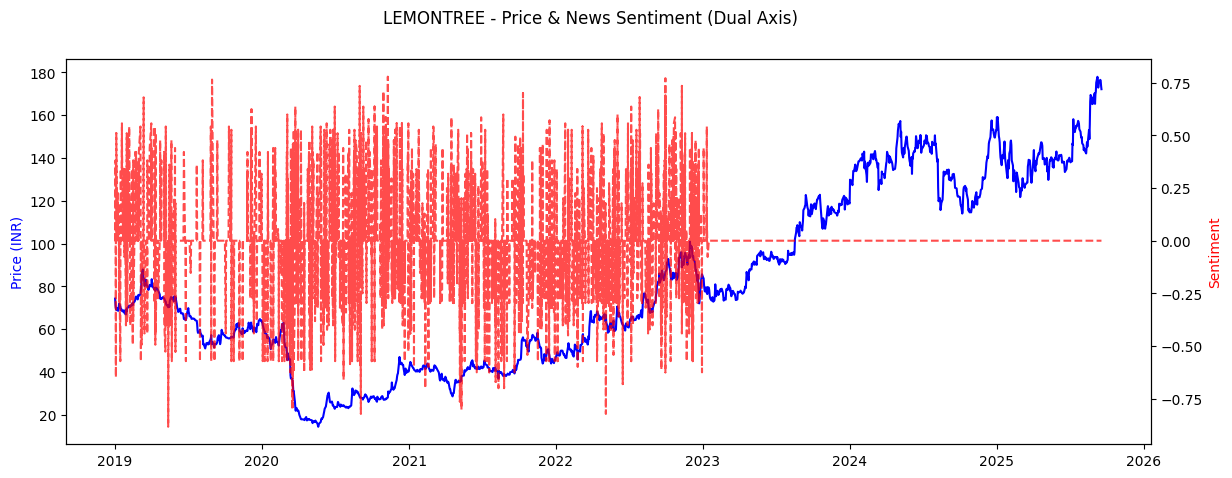

In [25]:
import matplotlib.pyplot as plt

ticker = 'LEMONTREE'  # or 'VBL', 'ASIANPAINT', etc.
sub = df[df['ticker'] == ticker]

fig, ax1 = plt.subplots(figsize=(14,5))
ax1.plot(sub['date'], sub['close_price'], 'b-', label='Price')
ax1.set_ylabel('Price (INR)', color='b')
ax2 = ax1.twinx()
ax2.plot(sub['date'], sub['sentiment_score'], 'r--', label='Sentiment', alpha=0.7)
ax2.set_ylabel('Sentiment', color='r')
fig.suptitle(f'{ticker} - Price & News Sentiment (Dual Axis)')
plt.show()



In [26]:
df.sort_values('date', inplace=True)
split_date = '2022-01-01'
train = df[df['date'] < split_date]
test  = df[df['date'] >= split_date]

features = ['close_price', 'sentiment_score', 'usd_inr_rate']  # Add more features if available
X_train = train[features]
y_train = train['return_direction']
X_test  = test[features]
y_test  = test['return_direction']


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.5856807511737089
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72      4881
           1       0.33      0.13      0.19      2787

    accuracy                           0.59      7668
   macro avg       0.48      0.49      0.46      7668
weighted avg       0.52      0.59      0.53      7668



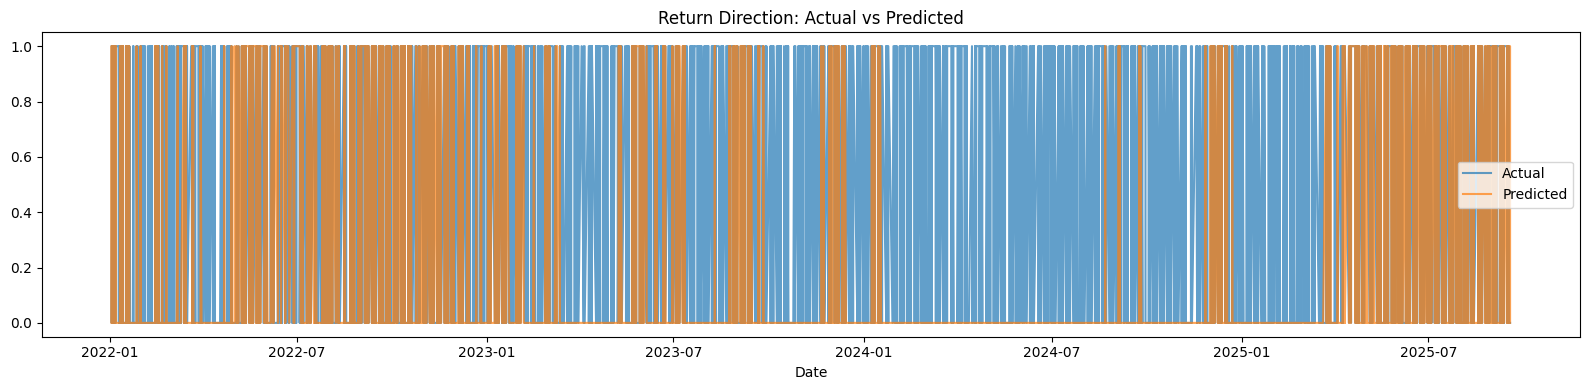

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.plot(test['date'], y_test.values, label='Actual', alpha=0.7)
plt.plot(test['date'], y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Return Direction: Actual vs Predicted')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


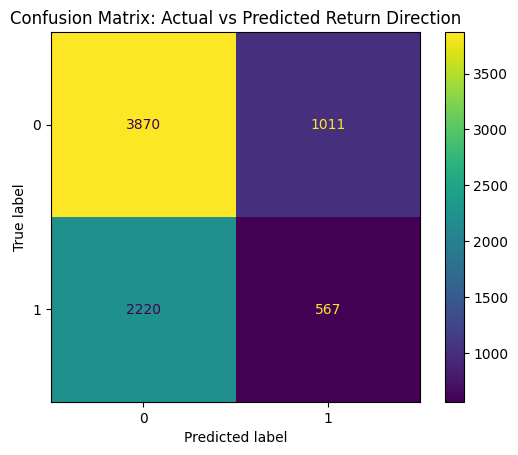

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title("Confusion Matrix: Actual vs Predicted Return Direction")
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.6365414710485133
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      4881
           1       0.00      0.00      0.00      2787

    accuracy                           0.64      7668
   macro avg       0.32      0.50      0.39      7668
weighted avg       0.41      0.64      0.50      7668



C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

close_price: 0.9151
sentiment_score: 0.0849


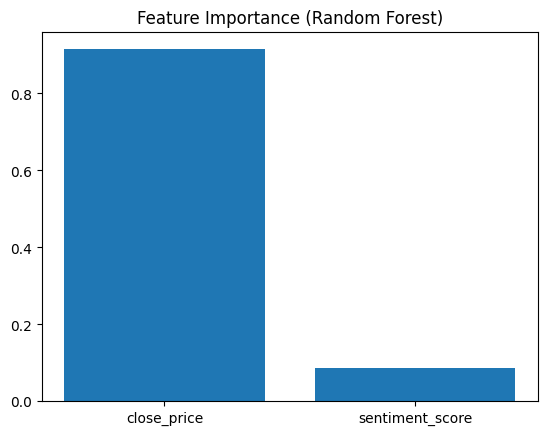

In [21]:
import numpy as np

importances = rf.feature_importances_
for col, importance in zip(features, importances):
    print(f"{col}: {importance:.4f}")

plt.bar(features, importances)
plt.title('Feature Importance (Random Forest)')
plt.show()


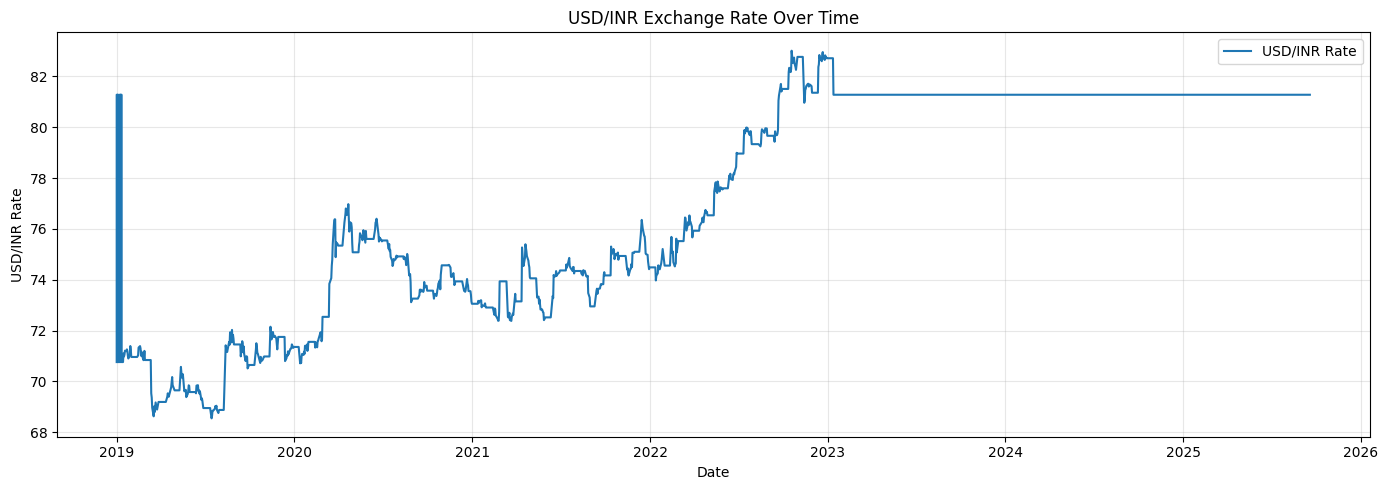

In [30]:
## FOR USD_INR_RATE VISUALIZATION
import matplotlib.pyplot as plt

usd_inr = df[['date', 'usd_inr_rate']].drop_duplicates().sort_values('date')
plt.figure(figsize=(14, 5))
plt.plot(usd_inr['date'], usd_inr['usd_inr_rate'], label='USD/INR Rate')
plt.title('USD/INR Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('USD/INR Rate')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


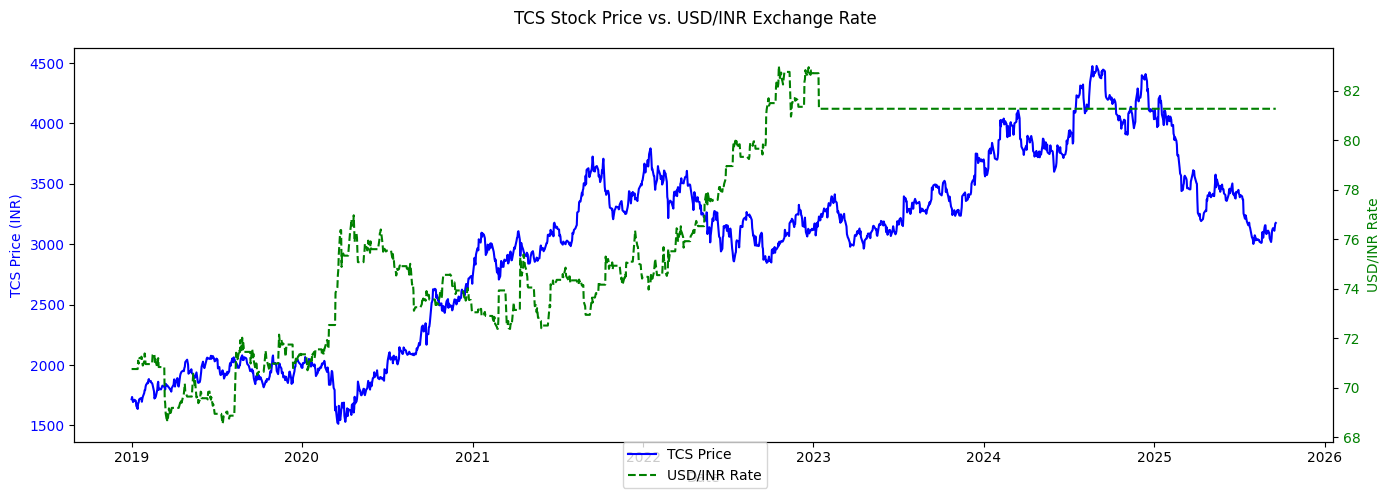

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your feature file
df = pd.read_csv('../data/features.csv', parse_dates=['date'])

# Choose a ticker, e.g., 'TCS', 'LEMONTREE', etc.
ticker = 'TCS'
sub = df[df['ticker'] == ticker].sort_values('date')

fig, ax1 = plt.subplots(figsize=(14,5))

# Left axis: Stock price
ax1.plot(sub['date'], sub['close_price'], 'b-', label=f'{ticker} Price')
ax1.set_xlabel('Date')
ax1.set_ylabel(f'{ticker} Price (INR)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Right axis: USD/INR rate
ax2 = ax1.twinx()
ax2.plot(sub['date'], sub['usd_inr_rate'], 'g--', label='USD/INR Rate')
ax2.set_ylabel('USD/INR Rate', color='g')
ax2.tick_params(axis='y', labelcolor='g')

fig.suptitle(f'{ticker} Stock Price vs. USD/INR Exchange Rate')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.13))
plt.show()


In [4]:
import pandas as pd

df = pd.read_csv('../data/interest_rate.csv')

# Remove % sign and convert string to float
df['interest_rate'] = df['interest_rate'].str.replace('%', '').astype(float)

print(df.head())


         date  interest_rate
0  2025-06-06           5.50
1  2025-04-09           6.00
2  2025-02-07           6.25
3  2024-12-06           6.50
4  2024-10-08           6.50


In [8]:
import pandas as pd

# Load and ensure date is in YYYY-MM-DD format
df = pd.read_csv('../data/interest_rate.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df[['date','interest_rate']].dropna().sort_values('date')

# Create daily calendar for your project period
project_days = pd.DataFrame({'date': pd.date_range('2019-01-01','2023-01-13', freq='D')})

# Forward-fill repo rate to all days
repo_daily = project_days.merge(df, on='date', how='left')
repo_daily['interest_rate'] = repo_daily['interest_rate'].ffill()
repo_daily.to_csv('../data/repo_daily_clean.csv', index=False)
print(repo_daily.head(10))
print(repo_daily.tail(10))


        date interest_rate
0 2019-01-01           NaN
1 2019-01-02           NaN
2 2019-01-03           NaN
3 2019-01-04           NaN
4 2019-01-05           NaN
5 2019-01-06           NaN
6 2019-01-07           NaN
7 2019-01-08           NaN
8 2019-01-09           NaN
9 2019-01-10           NaN
           date interest_rate
1464 2023-01-04         6.25%
1465 2023-01-05         6.25%
1466 2023-01-06         6.25%
1467 2023-01-07         6.25%
1468 2023-01-08         6.50%
1469 2023-01-09         6.50%
1470 2023-01-10         6.50%
1471 2023-01-11         6.50%
1472 2023-01-12         6.50%
1473 2023-01-13         6.50%


In [11]:
# Load cleaned USD/INR
fx = pd.read_csv('../data/usdinr_clean.csv', parse_dates=['date'])

# Merge repo rate with USD/INR into unified macro dataframe (outer join covers all dates)
macro = fx.merge(repo_daily, on='date', how='outer').sort_values('date')
macro['usd_inr_rate'] = macro['usd_inr_rate'].ffill().bfill()
macro['interest_rate'] = macro['interest_rate'].ffill().bfill()

macro.to_csv('../data/macro_all_clean.csv', index=False)
print(macro.head(10))


        date  usd_inr_rate interest_rate
0 2019-01-01         70.76         6.25%
1 2019-01-02         70.76         6.25%
2 2019-01-03         70.76         6.25%
3 2019-01-04         70.76         6.25%
4 2019-01-05         70.76         6.25%
5 2019-01-06         70.76         6.25%
6 2019-01-07         70.76         6.25%
7 2019-01-08         70.76         6.25%
8 2019-01-09         70.76         6.25%
9 2019-01-10         70.76         6.25%


In [15]:
import pandas as pd

repo = pd.read_csv('../data/repo_daily_clean.csv', parse_dates=['date'])
fx = pd.read_csv('../data/usdinr_clean.csv', parse_dates=['date'])

macro = fx.merge(repo, on='date', how='outer').sort_values('date')
macro['usd_inr_rate'] = macro['usd_inr_rate'].ffill().bfill()
macro['interest_rate'] = macro['interest_rate'].ffill().bfill()

macro.to_csv('../data/macro_all_clean.csv', index=False)
print(macro.head())
print(macro.tail())


        date  usd_inr_rate  interest_rate
0 2019-01-01         70.76           6.25
1 2019-01-02         70.76           6.25
2 2019-01-03         70.76           6.25
3 2019-01-04         70.76           6.25
4 2019-01-05         70.76           6.25
           date  usd_inr_rate  interest_rate
1469 2023-01-09        82.717            6.5
1470 2023-01-10        82.717            6.5
1471 2023-01-11        82.717            6.5
1472 2023-01-12        82.717            6.5
1473 2023-01-13        81.280            6.5


usd_inr_rate     0
interest_rate    0
dtype: int64


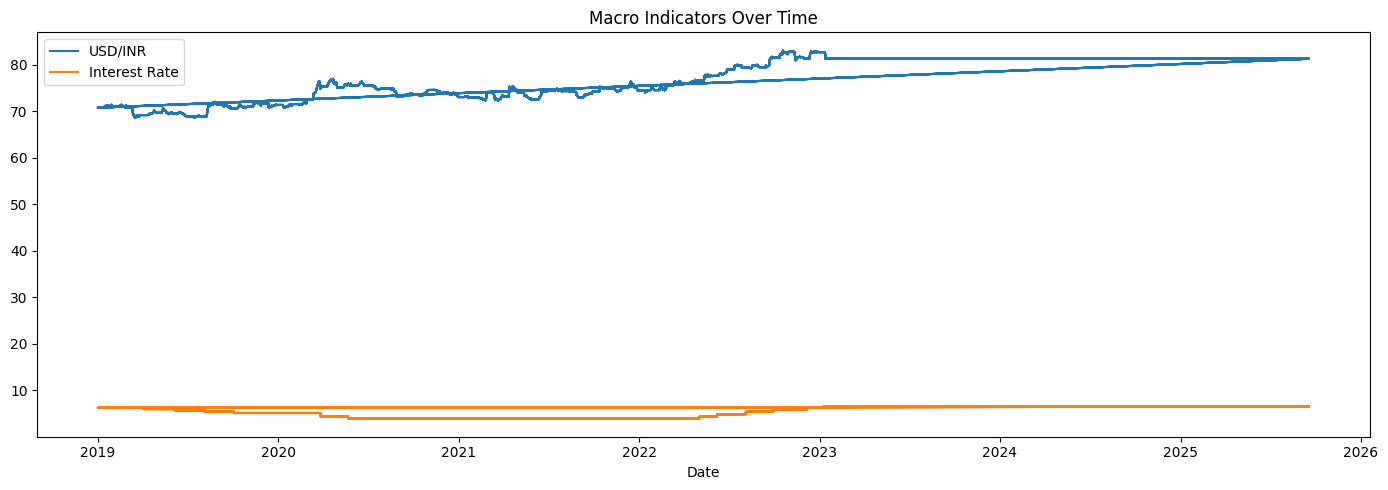

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/features.csv', parse_dates=['date'])

# Check non-null macro data
print(df[['usd_inr_rate', 'interest_rate']].isna().sum())

# Visualize macro indicators
plt.figure(figsize=(14,5))
plt.plot(df['date'], df['usd_inr_rate'], label='USD/INR')
plt.plot(df['date'], df['interest_rate'], label='Interest Rate')
plt.legend(); plt.xlabel('Date'); plt.title('Macro Indicators Over Time')
plt.tight_layout(); plt.show()
